# Preprocessing Idaho Regulatory data for WaDE upload.
- Purpose:  To preprocess the Idaho data into one master file for simple DataFrame creation and extraction.

In [1]:
#Needed Libararies

# working with data
import os
import numpy as np
import pandas as pd
import geopandas as gpd # the library that lets us read in shapefiles

# visulizaiton
import matplotlib.pyplot as plt
import seaborn as sns

# API retrieval
import requests
import json

# Cleanup
import re
from datetime import date
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in Pandas

In [2]:
# Working Directory
workingDir = "G:/Shared drives/WaDE Data/Idaho/Regulatory/RawInputData"
os.chdir(workingDir)

## Inputs

In [3]:
# Eastern Snake CAMP
inputFile = "Eastern_Snake_Comprehensive_Aquifer_Management_Plan.zip"
gdf_es = gpd.read_file(inputFile)

# Data Assessment UUID
gdf_es['WaDEUUID'] = "wade1"

# ReportingUnits
gdf_es['in_ReportingUnitName'] = "Eastern Snake"
gdf_es['in_ReportingUnitNativeID'] = "wade1"

# RegulatoryOverlay
gdf_es['in_RegulatoryName'] = "Eastern Snake CAMP"
gdf_es['in_RegulatoryOverlayNativeID'] = "wade1"
gdf_es['in_RegulatoryStatuteLink'] = "https://idwr.idaho.gov/iwrb/water-planning/camps/espa/"
gdf_es['in_StatutoryEffectiveDate'] = "01/01/2009"
gdf_es = gdf_es[['WaDEUUID', 'in_ReportingUnitName', 'in_ReportingUnitNativeID', 'in_RegulatoryName', 'in_RegulatoryOverlayNativeID', 'in_RegulatoryStatuteLink', 'in_StatutoryEffectiveDate', 'geometry']]

print(len(gdf_es))
gdf_es.head(1)

1


,WaDEUUID,in_ReportingUnitName,in_ReportingUnitNativeID,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,geometry
0,wade1,Eastern Snake,wade1,Eastern Snake CAMP,wade1,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,"POLYGON ((-111.67757 44.22304, -111.67054 44.2..."


In [4]:
# Rathdrum CAMP
inputFile = "Rathdrum_Comprehensive_Aquifer_Management_Plan.zip"
gdf_r = gpd.read_file(inputFile)

# Data Assessment UUID
gdf_r['WaDEUUID'] = "wade2"

# ReportingUnits
gdf_r['in_ReportingUnitName'] = "Rathdrum Prairie"
gdf_r['in_ReportingUnitNativeID'] = "wade2"

# RegulatoryOverlay
gdf_r['in_RegulatoryName'] = "Rathdrum Prairie CAMP"
gdf_r['in_RegulatoryOverlayNativeID'] = "wade2"
gdf_r['in_RegulatoryStatuteLink'] = "https://idwr.idaho.gov/IWRB/water-planning/CAMPs/rathdrum-prairie/"
gdf_r['in_StatutoryEffectiveDate'] = "01/01/2009"
gdf_r = gdf_r[['WaDEUUID', 'in_ReportingUnitName', 'in_ReportingUnitNativeID', 'in_RegulatoryName', 'in_RegulatoryOverlayNativeID', 'in_RegulatoryStatuteLink', 'in_StatutoryEffectiveDate', 'geometry']]

print(len(gdf_r))
gdf_r.head()

1


,WaDEUUID,in_ReportingUnitName,in_ReportingUnitNativeID,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,geometry
0,wade2,Rathdrum Prairie,wade2,Rathdrum Prairie CAMP,wade2,https://idwr.idaho.gov/IWRB/water-planning/CAM...,01/01/2009,"POLYGON ((-116.78942 48.04840, -116.79298 48.0..."


In [5]:
# Treasure Valley CAMP
inputFile = "Treasure_Valley_Comprehensive_Aquifer_Management_Plan.zip"
gdf_tv = gpd.read_file(inputFile)

# Data Assessment UUID
gdf_tv['WaDEUUID'] = "wade3"

# ReportingUnits
gdf_tv['in_ReportingUnitName'] = "Treasure Valley"
gdf_tv['in_ReportingUnitNativeID'] = "wade3"

# RegulatoryOverlay
gdf_tv['in_RegulatoryName'] = "Treasure Valley CAMP"
gdf_tv['in_RegulatoryOverlayNativeID'] = "wade3"
gdf_tv['in_RegulatoryStatuteLink'] = "https://idwr.idaho.gov/iwrb/water-planning/camps/treasure-valley/"
gdf_tv['in_StatutoryEffectiveDate'] = "01/01/2009"
gdf_tv = gdf_tv[['WaDEUUID', 'in_ReportingUnitName', 'in_ReportingUnitNativeID', 'in_RegulatoryName', 'in_RegulatoryOverlayNativeID', 'in_RegulatoryStatuteLink', 'in_StatutoryEffectiveDate', 'geometry']]


print(len(gdf_tv))
gdf_tv.head(1)

1


,WaDEUUID,in_ReportingUnitName,in_ReportingUnitNativeID,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,geometry
0,wade3,Treasure Valley,wade3,Treasure Valley CAMP,wade3,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,"POLYGON ((-116.61388 43.82598, -116.61388 43.8..."


In [6]:
# Concatenate inputs DataFrames together
frames = [gdf_es, gdf_r, gdf_tv]
gdfIn = pd.concat(frames)
print(len(gdfIn))
gdfIn.head()

3


,WaDEUUID,in_ReportingUnitName,in_ReportingUnitNativeID,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,geometry
0,wade1,Eastern Snake,wade1,Eastern Snake CAMP,wade1,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,"POLYGON ((-111.67757 44.22304, -111.67054 44.2..."
0,wade2,Rathdrum Prairie,wade2,Rathdrum Prairie CAMP,wade2,https://idwr.idaho.gov/IWRB/water-planning/CAM...,01/01/2009,"POLYGON ((-116.78942 48.04840, -116.79298 48.0..."
0,wade3,Treasure Valley,wade3,Treasure Valley CAMP,wade3,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,"POLYGON ((-116.61388 43.82598, -116.61388 43.8..."


## Create Output

In [7]:
# create output POD dataframe
df = pd.DataFrame(index=gdfIn.index)

# Data Assessment UUID
df['WaDEUUID'] = gdfIn['WaDEUUID']

# Date Info
df['in_Date'] = date.today().strftime('%m/%d')
df['in_Year'] = date.today().strftime('%Y')

# Organization
df['in_OrganizationUUID'] = "IDre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = gdfIn['in_ReportingUnitName']
df['in_ReportingUnitNativeID'] = gdfIn['in_ReportingUnitNativeID']
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Comprehensive Aquifer Management Plan"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "ID"
df['in_Geometry'] = gdfIn['geometry']

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Idaho Department of Water Resources"

df['in_RegulatoryDescription'] = """The 2008 Legislature approved House Bill 428 and House Bill 644 establishing the Statewide Comprehensive Aquifer Planning and Management Program (Idaho Code § 42-1779) and the Aquifer Planning and Management Fund (Idaho Code § 42-1780). This legislation authorized characterization and planning efforts for ten different basins from 2008 through 2018.

The Comprehensive Aquifer Planning and Management Program was designed to provide IWRB and IDWR with the necessary information to develop plans for managing groundwater and surface water resources into the future. The program had two phases: a technical component to characterize the surface water and groundwater resources of each basin a planning component to integrate the technical knowledge with an assessment of current and projected future water uses and constraints.  At the culmination of this program, the intent was to develop long-range plans for conjunctively managing the water resources of each basin by integrating hydrologic realities with the social needs. These water management plans were designed to address water supply and demand issues looking out 50 years into the future, and investigated strategies which will lead to sustainable water supplies and optimum use of the water resources."""

df['in_RegulatoryName'] = gdfIn['in_RegulatoryName']
df['in_RegulatoryOverlayNativeID'] = gdfIn['in_RegulatoryOverlayNativeID']
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = gdfIn['in_RegulatoryStatuteLink']
df['in_StatutoryEffectiveDate'] = gdfIn['in_StatutoryEffectiveDate']
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Comprehensive Aquifer Management Plan"
df['in_WaterSourceTypeCV'] = "Groundwater"


df = df.drop_duplicates().reset_index(drop=True)
outdf = df.copy()
print(len(outdf))
outdf.head()

3


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,wade1,05/17,2023,IDre_O1,4326,Eastern Snake,wade1,,Comprehensive Aquifer Management Plan,,ID,"POLYGON ((-111.67757 44.22304, -111.67054 44.2...",Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Eastern Snake CAMP,wade1,Active,,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,,Comprehensive Aquifer Management Plan,Groundwater
1,wade2,05/17,2023,IDre_O1,4326,Rathdrum Prairie,wade2,,Comprehensive Aquifer Management Plan,,ID,"POLYGON ((-116.78942 48.04840, -116.79298 48.0...",Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Rathdrum Prairie CAMP,wade2,Active,,https://idwr.idaho.gov/IWRB/water-planning/CAM...,01/01/2009,,Comprehensive Aquifer Management Plan,Groundwater
2,wade3,05/17,2023,IDre_O1,4326,Treasure Valley,wade3,,Comprehensive Aquifer Management Plan,,ID,"POLYGON ((-116.61388 43.82598, -116.61388 43.8...",Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Treasure Valley CAMP,wade3,Active,,https://idwr.idaho.gov/iwrb/water-planning/cam...,01/01/2009,,Comprehensive Aquifer Management Plan,Groundwater


## Clean Data and Concatenate DataFrames together into single output

In [8]:
# Ensure Empty String

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [9]:
outdf['in_ReportingUnitName'] = df.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Eastern Snake', 'Rathdrum Prairie', 'Treasure Valley'],
      dtype=object)

In [10]:
outdf['in_RegulatoryDescription'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['The 2008 Legislature approved House Bill 428 and House Bill 644 establishing the Statewide Comprehensive Aquifer Planning and Management Program (Idaho Code § 42-1779) and the Aquifer Planning and Management Fund (Idaho Code § 42-1780). This legislation authorized characterization and planning efforts for ten different basins from 2008 through 2018.\n\nThe Comprehensive Aquifer Planning and Management Program was designed to provide IWRB and IDWR with the necessary information to develop plans for managing groundwater and surface water resources into the future. The program had two phases: a technical component to characterize the surface water and groundwater resources of each basin a planning component to integrate the technical knowledge with an assessment of current and projected future water uses and constraints.  At the culmination of this program, the intent was to develop long-range plans for conjunctively managing the water resources of each basin by integrating hydrol

In [11]:
outdf['in_RegulatoryName'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Eastern Snake CAMP', 'Rathdrum Prairie CAMP',
       'Treasure Valley CAMP'], dtype=object)

In [12]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

array(['2009-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

# Shapefile Data

In [13]:
# already got the geometery for IDre

In [14]:
df_shape_out = outdf.copy()
print(len(df_shape_out))
df_shape_out.head()

3


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,wade1,05/17,2023,IDre_O1,4326,Eastern Snake,wade1,,Comprehensive Aquifer Management Plan,,ID,"POLYGON ((-111.67757 44.22304, -111.67054 44.2...",Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Eastern Snake CAMP,wade1,Active,,https://idwr.idaho.gov/iwrb/water-planning/cam...,2009-01-01,,Comprehensive Aquifer Management Plan,Groundwater
1,wade2,05/17,2023,IDre_O1,4326,Rathdrum Prairie,wade2,,Comprehensive Aquifer Management Plan,,ID,"POLYGON ((-116.78942 48.04840, -116.79298 48.0...",Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Rathdrum Prairie CAMP,wade2,Active,,https://idwr.idaho.gov/IWRB/water-planning/CAM...,2009-01-01,,Comprehensive Aquifer Management Plan,Groundwater
2,wade3,05/17,2023,IDre_O1,4326,Treasure Valley,wade3,,Comprehensive Aquifer Management Plan,,ID,"POLYGON ((-116.61388 43.82598, -116.61388 43.8...",Idaho Department of Water Resources,The 2008 Legislature approved House Bill 428 a...,Treasure Valley CAMP,wade3,Active,,https://idwr.idaho.gov/iwrb/water-planning/cam...,2009-01-01,,Comprehensive Aquifer Management Plan,Groundwater


<AxesSubplot: >

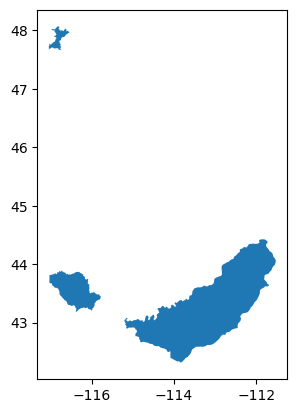

In [15]:
# plot
df_shape_out = df_shape_out[df_shape_out['in_Geometry'] != ""].reset_index(drop=True)
df_shape_out['Geometry'] = gpd.GeoSeries.from_wkt(df_shape_out['in_Geometry'].astype(str), crs="EPSG:4326")
gdf_shape_out = gpd.GeoDataFrame(df_shape_out, geometry=df_shape_out['Geometry'], crs="EPSG:4326") # covert to geodataframe
gdf_shape_out.plot()

### Inspect Output Data & Export

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_shape_out.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                             geometry
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [17]:
# Export out to CSV.
outdf.to_csv('Pre_idMain.zip', compression=dict(method='zip', archive_name='Pre_idMain.csv'), index=False)  # The output, save as a zip
df_shape_out.to_csv('P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.